In [32]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [33]:
ratings = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\ratings.csv")
movies = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\movies.csv")
links = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\links.csv")
tags = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\tags.csv")

In [34]:
df = pd.merge(ratings,movies,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [36]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [37]:
df.isnull().values.any()

False

In [38]:
df.duplicated().values.any()

False

In [39]:
# Drop unnecessary columns
df = df.drop(columns='timestamp')

In [40]:
#ratings dataframe with average rating and number of ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [41]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

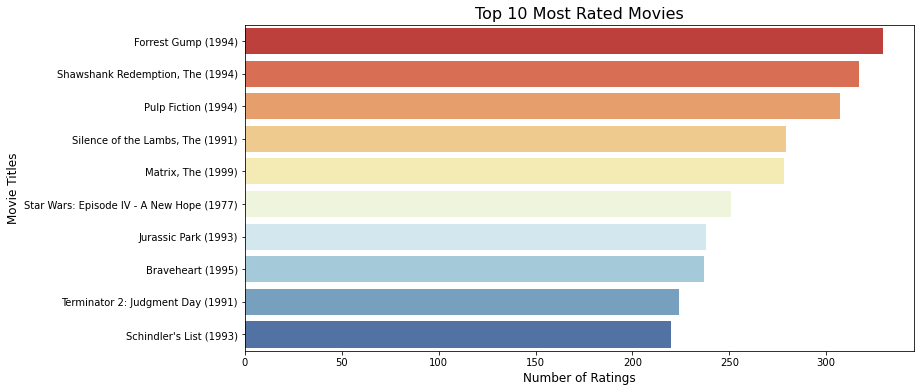

In [42]:
# Count the number of ratings per movie
top_movies = df['title'].value_counts().head(10)

# Plot the top 10 most rated movies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='RdYlBu')
plt.title('Top 10 Most Rated Movies', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Titles', fontsize=12)
plt.show()

In [43]:
movie_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
movie_ratings['no of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
movie_ratings.head()

,rating,no of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

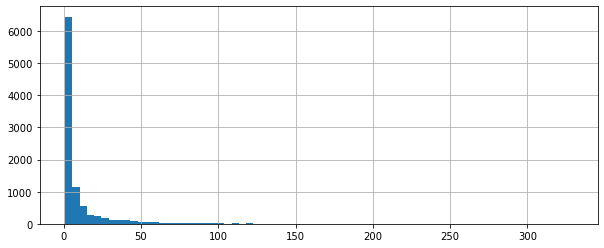

In [44]:
plt.figure(figsize=(10,4))
movie_ratings['no of ratings'].hist(bins=70)

<AxesSubplot:>

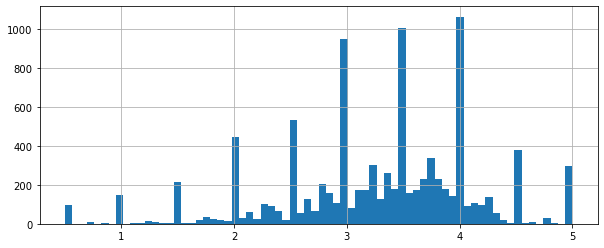

In [45]:
plt.figure(figsize=(10,4))
movie_ratings['rating'].hist(bins=70)

In [46]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
pip install surprise

In [48]:
from surprise import Reader, Dataset
reader = Reader()

# Ensure the DataFrame has only the necessary columns
df_for_surprise = df[['userId', 'movieId', 'rating']]

# Load the data into Surprise's Dataset object
data = Dataset.load_from_df(df_for_surprise, reader)

In [49]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [50]:
# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

In [51]:
# Assuming df is your original DataFrame with 'userId', 'movieId', 'rating'
reader = Reader(rating_scale=(0.5, 5.0))  # Define the rating scale based on your data
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# KNNBasic - Simple KNN model
knn_basic = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
knn_basic_results = cross_validate(knn_basic, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# KNNWithMeans - Adjusted KNN model with mean subtraction
knn_means = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': True})
knn_means_results = cross_validate(knn_means, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# KNNBaseline - KNN with baseline ratings
knn_baseline = KNNBaseline(sim_options={'name': 'cosine', 'user_based': True})
knn_baseline_results = cross_validate(knn_baseline, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Initialize the SVD model
svd = SVD()

# Perform cross-validation (5-fold by default) on the dataset
svd_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the results for comparison
print("KNNBasic Results")
print(f"Average RMSE: {knn_basic_results['test_rmse'].mean()}")
print(f"Average MAE: {knn_basic_results['test_mae'].mean()}")

print("\nKNNWithMeans Results")
print(f"Average RMSE: {knn_means_results['test_rmse'].mean()}")
print(f"Average MAE: {knn_means_results['test_mae'].mean()}")

print("\nKNNBaseline Results")
print(f"Average RMSE: {knn_baseline_results['test_rmse'].mean()}")
print(f"Average MAE: {knn_baseline_results['test_mae'].mean()}")

print("SVD Results")
print(f"Average RMSE: {svd_results['test_rmse'].mean()}")
print(f"Average MAE: {svd_results['test_mae'].mean()}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9747  0.9696  0.9733  0.9733  0.9676  0.9717  0.0027  
MAE (testset)     0.7504  0.7478  0.7476  0.7482  0.7463  0.7481  0.0013  
Fit time          2.29    1.28    1.39    1.27    1.40    1.53    0.39    
Test time         12.54   3.69    3.14    3.24    3.26    5.17    3.69    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [52]:
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}       


In [53]:
# Initialize GridSearch for KNNBasic
gs_knn_basic = GridSearchCV(KNNBasic, params, measures=['rmse', 'mae'], cv=5, n_jobs=-1)

# Perform the grid search
gs_knn_basic.fit(data)

# Print the best RMSE score and corresponding parameters
print(f"Best RMSE for KNNBasic: {gs_knn_basic.best_score['rmse']}")
print(f"Best parameters for KNNBasic: {gs_knn_basic.best_params['rmse']}")

Best RMSE for KNNBasic: 0.9475655751413633
Best parameters for KNNBasic: {'n_factors': 20, 'reg_all': 0.02}


In [54]:
# Initialize GridSearch for KNNWithMeans
gs_knn_means = GridSearchCV(KNNWithMeans, params, measures=['rmse', 'mae'], cv=5, n_jobs=-1)

# Perform the grid search
gs_knn_means.fit(data)

# Print the best RMSE score and corresponding parameters
print(f"Best RMSE for KNNWithMeans: {gs_knn_means.best_score['rmse']}")
print(f"Best parameters for KNNWithMeans: {gs_knn_means.best_params['rmse']}")

Best RMSE for KNNWithMeans: 0.8968371762488772
Best parameters for KNNWithMeans: {'n_factors': 20, 'reg_all': 0.02}


In [55]:
# Initialize GridSearch for KNNBaseline
gs_knn_baseline = GridSearchCV(KNNBaseline, params, measures=['rmse', 'mae'], cv=5, n_jobs=-1)

# Perform the grid search
gs_knn_baseline.fit(data)

# Print the best RMSE score and corresponding parameters
print(f"Best RMSE for KNNBaseline: {gs_knn_baseline.best_score['rmse']}")
print(f"Best parameters for KNNBaseline: {gs_knn_baseline.best_params['rmse']}")

Best RMSE for KNNBaseline: 0.8749855919519369
Best parameters for KNNBaseline: {'n_factors': 20, 'reg_all': 0.02}


In [56]:
# Initialize GridSearch for SVD
g_s_svd = GridSearchCV(SVD, params, measures=['rmse', 'mae'], cv=5, n_jobs=-1)

# Perform the grid search
g_s_svd.fit(data)

# Print the best RMSE score and corresponding parameters
print(f"Best RMSE for SVD: {g_s_svd.best_score['rmse']}")
print(f"Best parameters for SVD: {g_s_svd.best_params['rmse']}")

Best RMSE for SVD: 0.8688131083353545
Best parameters for SVD: {'n_factors': 50, 'reg_all': 0.05}


In [57]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8688131083353545, 'mae': 0.6676689345858803}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'reg_all': 0.05}}


In [58]:
# Build the full trainset with the best parameters
best_params = g_s_svd.best_params
trainset = data.build_full_trainset()

In [59]:
print("Best parameters:", g_s_svd.best_params)

Best parameters: {'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'reg_all': 0.05}}


In [60]:
# Get the best parameters for RMSE
best_params = g_s_svd.best_params
print("Best parameters:", best_params)

# Access the best parameters for RMSE
best_rmse_params = best_params['rmse']
print("Best parameters for RMSE:", best_rmse_params)

# Check the structure of best_rmse_params
print("Best RMSE Params Structure:", best_rmse_params)

# Initialize and fit the SVD model with the best parameters
try:
    algo = SVD(
        n_factors=best_rmse_params['n_factors'],  
        n_epochs=10,  
        lr_all=0.01,  
        reg_all=best_rmse_params['reg_all']
    )
except KeyError as e:
    print(f"Parameter not found: {e}")

# Fit the model on the full trainset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

# Predicting the ratings for the test set
predictions = algo.test(testset)

# Optional: Print some predictions
for uid, iid, true_r, est, _ in predictions[:10]:  # Display the first 10 predictions
    print(f'User: {uid}, Item: {iid}, True Rating: {true_r}, Estimated Rating: {est}')


Best parameters: {'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'reg_all': 0.05}}
Best parameters for RMSE: {'n_factors': 50, 'reg_all': 0.05}
Best RMSE Params Structure: {'n_factors': 50, 'reg_all': 0.05}
User: 1, Item: 318, True Rating: 3.501556983616962, Estimated Rating: 5.0
User: 1, Item: 1704, True Rating: 3.501556983616962, Estimated Rating: 4.886094008408172
User: 1, Item: 6874, True Rating: 3.501556983616962, Estimated Rating: 4.777325710252797
User: 1, Item: 8798, True Rating: 3.501556983616962, Estimated Rating: 4.522715632497603
User: 1, Item: 46970, True Rating: 3.501556983616962, Estimated Rating: 4.211299397120978
User: 1, Item: 48516, True Rating: 3.501556983616962, Estimated Rating: 4.94701474566516
User: 1, Item: 58559, True Rating: 3.501556983616962, Estimated Rating: 4.992066021238389
User: 1, Item: 60756, True Rating: 3.501556983616962, Estimated Rating: 4.408434849853471
User: 1, Item: 68157, True Rating: 3.501556983616962, Estimated Rating

In [61]:
def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

In [62]:
from collections import defaultdict

def get_all_predictions(predictions):
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)

    return top_n

# Assuming predictions is already generated from algo.test(testset)
predictions = algo.test(testset)  # Ensure this is executed first
all_pred = get_all_predictions(predictions)  # Get all predictions

# To get top N recommendations
n = 4

# Limit each user's recommendations to the top N
for uid in all_pred.keys():
    all_pred[uid] = all_pred[uid][:n]  # Keep only the top N recommendations

# Optional: Print top recommendations for each user
for uid, user_ratings in all_pred.items():
    print(f'User {uid}: {user_ratings}')

User 1: [(318, 5.0), (912, 5.0), (750, 5.0), (1201, 5.0)]
User 5: [(750, 4.376790474906989), (1204, 4.256029003833752), (1104, 4.251772023385405), (1213, 4.225208154853126)]
User 7: [(898, 4.14070883882394), (858, 4.108118430100045), (318, 4.044623695534187), (296, 4.03282009935347)]
User 15: [(2160, 4.115594574893137), (1197, 4.082815400875129), (1204, 4.080272026757773), (1248, 4.079868250853844)]
User 17: [(1204, 4.537585738343347), (1104, 4.51083969773903), (1233, 4.496896352850831), (3451, 4.49378136660935)]
User 18: [(1104, 4.4857264964186285), (750, 4.441897514766068), (1204, 4.433542560807438), (1233, 4.403076468943022)]
User 19: [(1204, 3.5776673090854), (750, 3.5096349056994476), (858, 3.4916048847027885), (741, 3.490010667421488)]
User 21: [(246, 3.8526692617725726), (3275, 3.8077708818442413), (1237, 3.7980145135467662), (2160, 3.7879824945910694)]
User 27: [(318, 4.324479014477002), (912, 4.291465829871021), (1104, 4.246726566658596), (50, 4.236848868455852)]
User 31: [(12

In [63]:
def get_user_recommendations(user_id):
    if user_id in all_pred:
        recommended_movies = all_pred[user_id]
        print(f"Top {n} recommendations for User {user_id}:")
        for movie_id, estimated_rating in recommended_movies:
            print(f"Movie ID: {movie_id}, Estimated Rating: {estimated_rating:.2f}")
    else:
        print(f"No recommendations available for User {user_id}.")

# Get recommendations for user 1
get_user_recommendations(user_id=10)

Top 4 recommendations for User 10:
Movie ID: 898, Estimated Rating: 4.22
Movie ID: 750, Estimated Rating: 4.13
Movie ID: 904, Estimated Rating: 4.12
Movie ID: 951, Estimated Rating: 4.11


In [70]:
def get_user_recommendations(user_id):
    if user_id in all_pred:
        recommended_movies = all_pred[user_id]
        print(f"Top {n} recommendations for User {user_id}:")
        
        # Create a DataFrame for the recommendations
        recommendations_df = pd.DataFrame(recommended_movies, columns=['movieId', 'estimated_rating'])
        
        # Merge with the movies DataFrame to get titles
        recommended_with_titles = recommendations_df.merge(movies, on='movieId', how='left')
        
        # Display movie titles and estimated ratings
        for _, row in recommended_with_titles.iterrows():
            print(f"Movie Title: {row['title']}, Estimated Rating: {row['estimated_rating']:.2f}")
    else:
        print(f"No recommendations available for User {user_id}.")

# Get recommendations for user 29
get_user_recommendations(user_id=10)

Top 4 recommendations for User 10:
Movie Title: Philadelphia Story, The (1940), Estimated Rating: 4.22
Movie Title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Estimated Rating: 4.13
Movie Title: Rear Window (1954), Estimated Rating: 4.12
Movie Title: His Girl Friday (1940), Estimated Rating: 4.11


In [65]:
tmp = pd.DataFrame.from_dict(all_pred)
tmp_transpose = tmp.transpose()

In [66]:
def get_predictions(user_id):
    results = tmp_transpose.loc[user_id]
    return results

In [67]:
user_id=29
results = get_predictions(user_id)
results

0    (1233, 4.657507171929069)
1    (1104, 4.623279227631057)
2    (1248, 4.597576542854632)
3    (1225, 4.575339623609147)
Name: 29, dtype: object

In [68]:
recommended_movie_ids=[]
for x in range(0, n):
    recommended_movie_ids.append(results[x][0])

recommended_movie_ids

[1233, 1104, 1248, 1225]

In [69]:
movies = pd.read_csv("D:\\Users\\Vero\\Desktop\\PHASE_4 Project G7\\ml-latest-small\\movies.csv")
movies.head()
recommended_movies = movies[movies['movieId'].isin(recommended_movie_ids)]
recommended_movies

,movieId,title,genres
841,1104,"Streetcar Named Desire, A (1951)",Drama
926,1225,Amadeus (1984),Drama
933,1233,"Boot, Das (Boat, The) (1981)",Action|Drama|War
947,1248,Touch of Evil (1958),Crime|Film-Noir|Thriller
